Group Number: 18 <br>
Group Members:
1. Ashwini Kumar Saurabh (Roll No: 2021c104011)
2. Arya Banerjee (Roll No: 2021c104010)
3. Rishabh Chowdhury (Roll No: 2021c104023)

Assignment Dataset: Mushroom Classification

https://drive.google.com/file/d/1Urc0bLTFCV65FPHK-MGw9rXoIJhwreiH/view?usp=sharing


In [34]:
data_path=r'mushrooms.csv'

## Import Libraries/Dataset

In [35]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth=1000

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

## Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import f1_score, confusion_matrix

In [36]:
df=pd.read_csv(data_path)

## 1 Data Visualization and Exploration

### 1.1 Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [37]:
print(df.head(2))

  class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
0     p         x           s         n       t    p               f            c         n          k           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
1     e         x           s         y       t    a               f            c         b          k           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       g


### 1.2 Comment on class imbalance with appropriate visualization method.

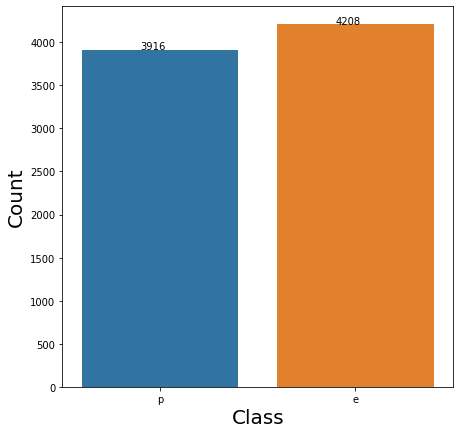

In [38]:
# Distribution of target class 
plt.rcParams["figure.figsize"] = [7, 7]
ax = sns.countplot(x='class', data = df)

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

plt.show()

Class P(ie. Poisonous) and E(ie. Edible) are balanced classes.

### 1.3 Provide appropriate visualizations to get an insight about the dataset.

In [39]:
#removing any duplicate data from the data set
df=df.drop_duplicates()

# Identify columns having categorical values
#Columns  index and enrollee_id are not categorical column. Analyse remaining columns
for i, val in enumerate(list(df.columns)):
    print('\n\n')
    print (val)
    print(df.groupby([val], dropna=False, as_index=False).size().head(20))




class
  class  size
0     e  4208
1     p  3916



cap-shape
  cap-shape  size
0         b   452
1         c     4
2         f  3152
3         k   828
4         s    32
5         x  3656



cap-surface
  cap-surface  size
0           f  2320
1           g     4
2           s  2556
3           y  3244



cap-color
  cap-color  size
0         b   168
1         c    44
2         e  1500
3         g  1840
4         n  2284
5         p   144
6         r    16
7         u    16
8         w  1040
9         y  1072



bruises
  bruises  size
0       f  4748
1       t  3376



odor
  odor  size
0    a   400
1    c   192
2    f  2160
3    l   400
4    m    36
5    n  3528
6    p   256
7    s   576
8    y   576



gill-attachment
  gill-attachment  size
0               a   210
1               f  7914



gill-spacing
  gill-spacing  size
0            c  6812
1            w  1312



gill-size
  gill-size  size
0         b  5612
1         n  2512



gill-color
   gill-color  size
0           b  1

All columns are categorical columns. Use Label encoder to assign numeric values for these columns


In [40]:
print("Before LabelEncoder :\n")
print(df.head())
df=df.apply(preprocessing.LabelEncoder().fit_transform)
print("\nAfter LabelEncoder :\n")
print(df.head())

Before LabelEncoder :

  class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
0     p         x           s         n       t    p               f            c         n          k           e          e                        s                        s                      w                      w         p          w           o         p                 k          s       u
1     e         x           s         y       t    a               f            c         b          k           e          c                        s                        s                      w                      w         p          w           o         p                 n          n       g
2     e         b           s         w       t    l               f   

### 1.4 Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer.

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


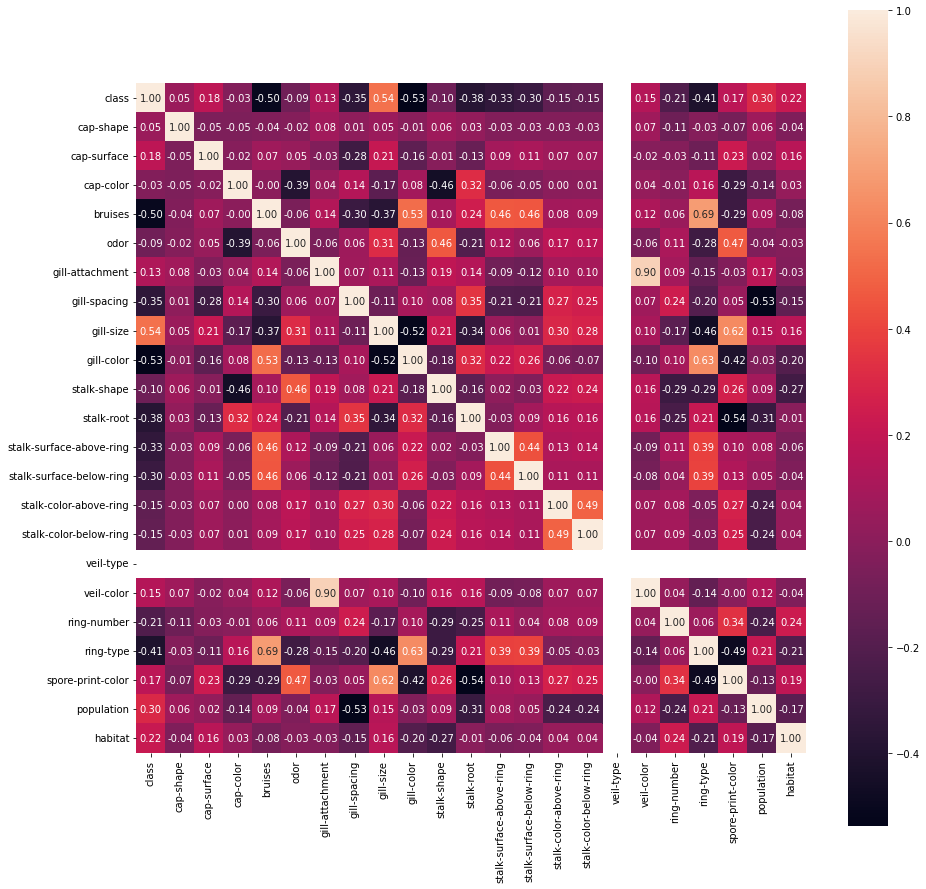

In [41]:
cols=list(df.columns)
plt.figure(figsize=(15,15))
cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

We observed that veil-type column has no correlation with any columns. It has constant value for all rows. This column can be deleted. <br>
Veil-color and gill-attachment has high correlation of 0.9, so we can keep one column(veil-color) and remove other (gill-attachment)

In [42]:
df=df.drop(['veil-type'], axis=1)

Scale the column values using MinMaxScaler or StandardScaler

In [43]:
scaler = preprocessing.MinMaxScaler()
features=list(df.columns)
features.remove('class')
print(df.head())
for i, column in enumerate(features):

  df[[column]]=scaler.fit_transform(df[[column]])

print(df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  ring-type  spore-print-color  population  habitat
0      1          5            2          4        1     6                1             0          1           4            0           3                         2                         2                       7                       7           2            1          4                  2           3        5
1      0          5            2          9        1     0                1             0          0           4            0           2                         2                         2                       7                       7           2            1          4                  3           2        1
2      0          0            2          8        1     3

### 1.5 Any other visualisation specific to the problem statement.

Check how the features are distributed accross the mushroom class (1: Posonous, 0: Edible)

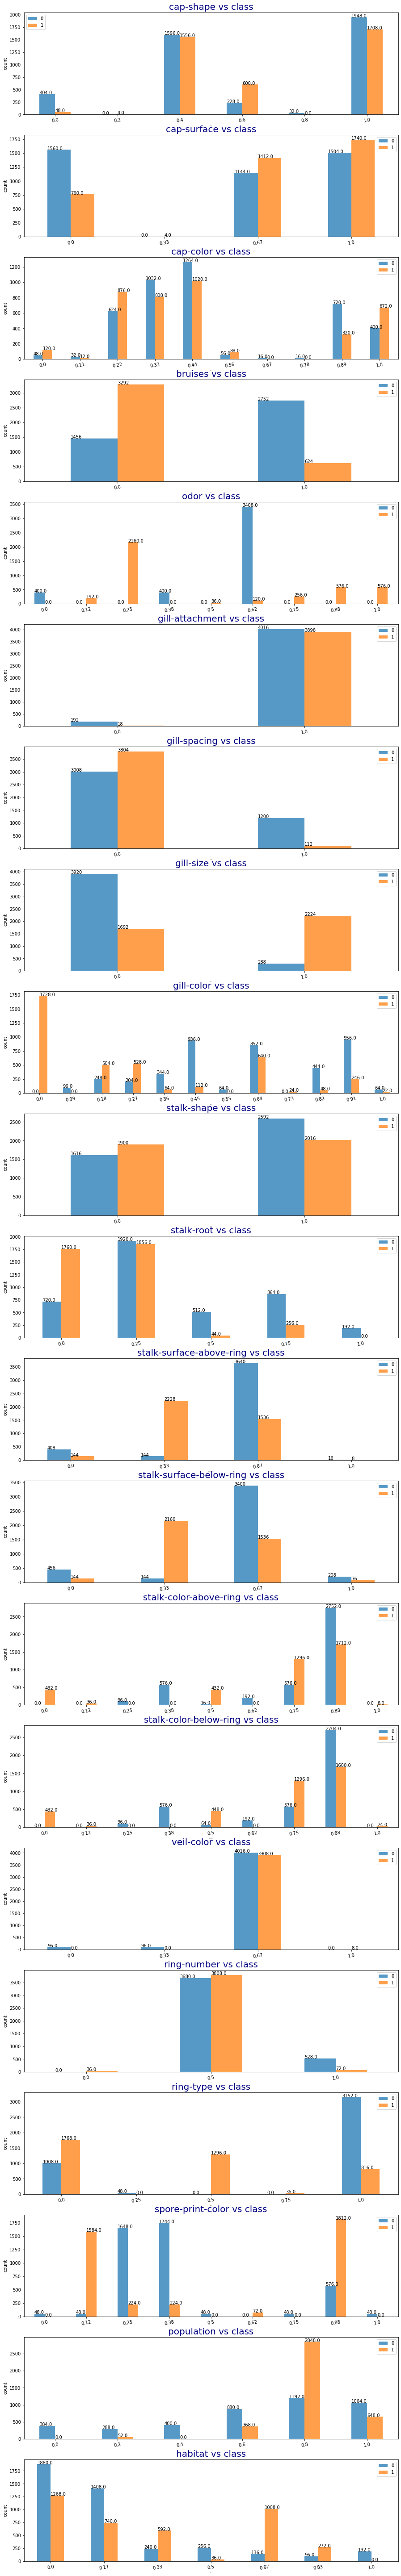

In [44]:
# check how all the  features are distributed.


cols= list(df.columns)
cols.remove('class')



plt.figure(figsize=(15,len(cols)*5))

for i,val in enumerate(cols):
  #print( i.__str__() +'  ' + val)
  plt.subplot(len(cols), 1, i+1)
  df_plot= df.groupby([val,'class'])["class"].count().reset_index(name="count")
  df_plot=df_plot.round(decimals = 2)
  df_plot=df_plot.pivot(val, "class", "count")
  df_plot.reset_index(inplace=True)
  ax=df_plot.plot(x=val, y=[0, 1], kind="bar",logy=False,logx=False,ax=plt.gca(),fontsize = 10,alpha=0.75, rot=10,sort_columns = True)
  for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))
  plt.title( val +' vs class',fontsize = 20, color='Navy')
  plt.legend(fontsize = 10)
  plt.xlabel(val,fontsize = 0)
  plt.ylabel('count',fontsize = 10)

## 2 Data Pre-processing and cleaning

### 2.1 Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell.Explore a few latest data balancing tasks and its effect on model evaluation parameters.

 Handle null or missing value

In [45]:
# get count of null values in each column
features=list(df.columns)
for i, column in enumerate(features):
  print(df[[column]].isna().sum())



class    0
dtype: int64
cap-shape    0
dtype: int64
cap-surface    0
dtype: int64
cap-color    0
dtype: int64
bruises    0
dtype: int64
odor    0
dtype: int64
gill-attachment    0
dtype: int64
gill-spacing    0
dtype: int64
gill-size    0
dtype: int64
gill-color    0
dtype: int64
stalk-shape    0
dtype: int64
stalk-root    0
dtype: int64
stalk-surface-above-ring    0
dtype: int64
stalk-surface-below-ring    0
dtype: int64
stalk-color-above-ring    0
dtype: int64
stalk-color-below-ring    0
dtype: int64
veil-color    0
dtype: int64
ring-number    0
dtype: int64
ring-type    0
dtype: int64
spore-print-color    0
dtype: int64
population    0
dtype: int64
habitat    0
dtype: int64


We don't have any Null or missing value. Now check distribution of column values over data set to find, if we have any outlier. Since all the columns are having categorical data. We will plot bargraph to check count of values in each column

### 2.2 Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

### 2.3 Feature Engineering - Chi Square

Since the data set comprises of categorical values, have used the chi square test. The chi-square value is calculated between each attribute and the target variable, and the attributes with the best chi-square value is selected.

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features=list(df.columns)
features.remove('class')

x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['class']].values

# Standardizing the features

chi_scores = chi2(x,y)

In [47]:
df_chi=pd.DataFrame(chi_scores)
df_chi.columns=features
df_chi_scores=df_chi.transpose()
df_chi_scores['features'] = df_chi_scores.index
df_chi_scores.columns=['Chi_Square', 'P_Value','Features']
df_chi_scores = df_chi_scores.reset_index(drop=True)
df_chi_scores= df_chi_scores.sort_values('P_Value')
print(df_chi_scores)

     Chi_Square        P_Value                  Features
7   1636.606833   0.000000e+00                 gill-size
3   1194.277352  1.069037e-261                   bruises
6    826.795274  8.061293e-182              gill-spacing
8    541.614952  8.396613e-120                gill-color
17   487.652537  4.619510e-108                 ring-type
10   296.507305   1.899882e-66                stalk-root
20   125.218248   4.559398e-29                   habitat
11    74.327467   6.617633e-18  stalk-surface-above-ring
1     71.356181   2.982221e-17               cap-surface
12    68.882727   1.044961e-16  stalk-surface-below-ring
19    62.353347   2.870432e-15                population
18    47.391591   5.813152e-12         spore-print-color
9     36.594105   1.454709e-09               stalk-shape
13    14.974027   1.090012e-04    stalk-color-above-ring
14    13.723676   2.117680e-04    stalk-color-below-ring
16    12.823168   3.423536e-04               ring-number
4      9.488770   2.067333e-03 

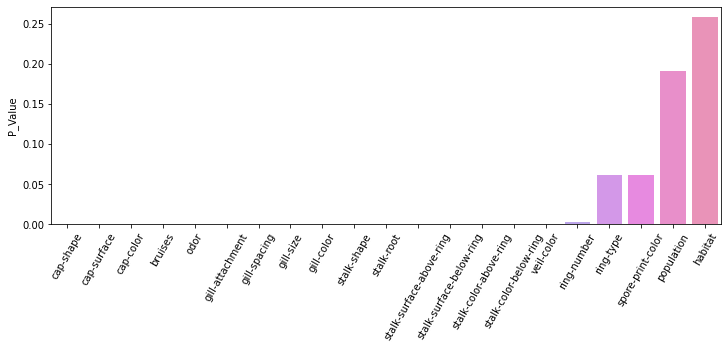

In [48]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(111)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
sns.barplot(x=features, y='P_Value', data=df_chi_scores, ax=ax)
plt.show()

Features having low P-Value are important features while features having high p value are less important.

### 2.4 Feature Engineering --Random Forest Classifier

Since the data set is considerably large we have used random forest classifier (8000+ rows).
Random forest classifier techinique uses multiple  decision trees and merges them together to form a precise and stable prediction for a larger data set.

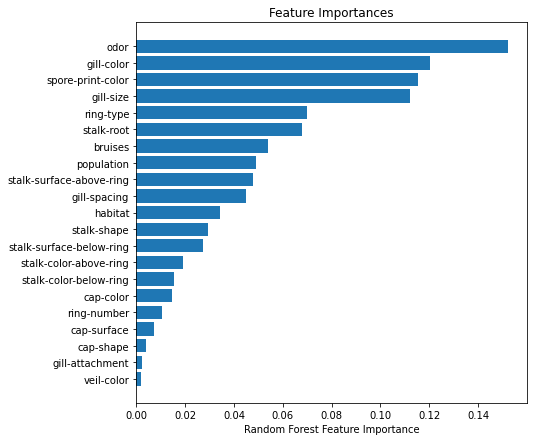

In [49]:
#Check feature importance
from sklearn import ensemble
import matplotlib.pyplot as plt
import numpy as np

##Get list of features which will be used to predict 'subs_deposit'. 
featured_cols= list(df.columns)
col_names= featured_cols
col_names.remove('class')


##Use model RandomForestRegressor to see feature importance to predict target 'subs_deposit'
model=ensemble.RandomForestClassifier()
#fit the model with train data
model.fit(df[col_names],df['class'])
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()


Important features are : 'odor', 'gill-color', 'gill-size', 'spore-print-color', 'stalk-root', 'population', 'stalk-surface-above-ring', 'ring-type', 'bruises', 'stalk-surface-below-ring', 'gill-spacing', 'habitat','stalk-shape' <br>

Less important features are : 'stalk-color-below-ring', 'stalk-color-above-ring', 'cap-color', 'ring-number', 'cap-surface', 'cap-shape', 'veil-color', 'gill-attachment'


In [50]:
imp_features=['odor', 'gill-color', 'gill-size', 'spore-print-color', 'stalk-root', 'population', 'stalk-surface-above-ring', 'ring-type', 'bruises', 'stalk-surface-below-ring', 'gill-spacing', 'habitat','stalk-shape','class']
print('Important Features According to Random Forest Classifier:\n')
data_df=df[imp_features]
data_df.head()

Important Features According to Random Forest Classifier:



,odor,gill-color,gill-size,spore-print-color,stalk-root,population,stalk-surface-above-ring,ring-type,bruises,stalk-surface-below-ring,gill-spacing,habitat,stalk-shape,class
0,0.750,0.363636,1.0,0.250,0.75,0.6,0.666667,1.0,1.0,0.666667,0.0,0.833333,0.0,1
1,0.000,0.363636,0.0,0.375,0.50,0.4,0.666667,1.0,1.0,0.666667,0.0,0.166667,0.0,0
2,0.375,0.454545,0.0,0.375,0.50,0.4,0.666667,1.0,1.0,0.666667,0.0,0.500000,0.0,0
3,0.750,0.454545,1.0,0.250,0.75,0.6,0.666667,1.0,1.0,0.666667,0.0,0.833333,0.0,1
4,0.625,0.363636,0.0,0.375,0.75,0.0,0.666667,0.0,0.0,0.666667,1.0,0.166667,1.0,0


## 3 Model Building

### Split the dataset into training and test sets.  
Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20%  <br>
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

In [51]:
imp_features.remove('class')
x = data_df.loc[:, imp_features].values
# Separating out the target
y = data_df.loc[:,['class']].values

x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, stratify=y,random_state=42, test_size=0.20)
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, stratify=y,random_state=42, test_size=0.90)
print(x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape)

(6499, 13) (6499, 1) (1625, 13) (1625, 1)
(812, 13) (812, 1) (7312, 13) (7312, 1)


### 3.1 Logistic Regression with test size 20%


Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% 

####  3.1.1 Logistic Regression With Regularization

In [52]:

classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7), "penalty":["l2"]
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train1, y_train1.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best score: 0.9412215801439939
Best Parameter set:
	 C: 1.0
	 penalty: l2


In [53]:
best_model = model.best_estimator_
best_model.fit(x_train1,y_train1)

preds=best_model.predict(x_test1)

print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test1, preds)))
print(confusion_matrix(y_test1, preds))

Accuracy score: 0.950
[[812  30]
 [ 52 731]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 3.1.2 Logistic Regression Without Regularization

In [54]:

classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7)
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train1, y_train1.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best score: 0.9412215801439939
Best Parameter set:
	 C: 1.0


In [55]:
best_model = model.best_estimator_
best_model.fit(x_train1,y_train1)

preds=best_model.predict(x_test1)

print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test1, preds)))
print(confusion_matrix(y_test1, preds))

Accuracy score: 0.950
[[812  30]
 [ 52 731]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 3.1.3 Logistic regression without Cross Validation

In [56]:

classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7)
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    #cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train1, y_train1.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best score: 0.9402980991295079
Best Parameter set:
	 C: 1.0


In [57]:
best_model = model.best_estimator_
best_model.fit(x_train1,y_train1)

preds=best_model.predict(x_test1)

print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test1, preds)))
print(confusion_matrix(y_test1, preds))

Accuracy score: 0.950
[[812  30]
 [ 52 731]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<table>
  <tr> 
   <th> Test % & Train % </th>
    <th>Model Name </th>
    <th> Regularization </th>
    <th> Cross Validation </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case1: Train 80% & Test: 20%  </td>
    <td> Logistic Regression </td>
    <td> Yes: L2 </td>
    <td> Yes </td>
    <td> 95% </td>
   
  </tr>
      
  <tr>
    <td>Case1: Train 80% & Test: 20% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> Yes </td>
    <td> 95% </td>
   
   </tr>

   <tr>
    <td>Case1: Train 80% & Test: 20% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> No </td>
    <td> 95% </td>
   
   </tr>
  </table>
  

### 3.2 Logistic Regression with test size 90%

Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

####  3.2.1 Logistic Regression With Regularization

In [58]:
classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7), "penalty":["l2"]
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train2, y_train2.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best score: 0.9618226600985222
Best Parameter set:
	 C: 10.0
	 penalty: l2


In [59]:
best_model = model.best_estimator_
best_model.fit(x_train2,y_train2.ravel())

preds=best_model.predict(x_test2)
#print("F1 score: {:.3f}".format(f1_score(y_test2, preds)))
print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test2, preds)))
print(confusion_matrix(y_test2, preds))

Accuracy score: 0.950
[[3630  157]
 [ 209 3316]]


####  3.2.2 Logistic Regression Without Regularization

In [60]:
classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7)
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train2, y_train2.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 4 folds for each of 7 candidates, totalling 28 fits
Best score: 0.9618226600985222
Best Parameter set:
	 C: 10.0


In [61]:
best_model = model.best_estimator_
best_model.fit(x_train2,y_train2.ravel())

preds=best_model.predict(x_test2)

print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test2, preds)))
print(confusion_matrix(y_test2.ravel(), preds.ravel()))

Accuracy score: 0.950
[[3630  157]
 [ 209 3316]]


#### 3.2.3 Logistic regression without Cross Validation

In [62]:
classifier=LogisticRegression()
param_grid = {
   "C":np.logspace(-3,3,7)
}

#initialize grid serach
model=model_selection.GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=1,
    n_jobs=1,
    #cv=4
)
#fit the model 
#Random forest classifier doesn't need scaling
model.fit(x_train2, y_train2.ravel())
print(f"Best score: {model.best_score_}")
print("Best Parameter set:")
best_parameters=model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best score: 0.9581383019010831
Best Parameter set:
	 C: 10.0


In [63]:
best_model = model.best_estimator_
best_model.fit(x_train2,y_train2)

preds=best_model.predict(x_test2)
print("Accuracy score: {:.3f}".format(metrics.accuracy_score(y_test2, preds)))
print(confusion_matrix(y_test2, preds))

Accuracy score: 0.950
[[3630  157]
 [ 209 3316]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<table>
  <tr> 
   <th> Test % & Train % </th>
    <th> Model Name </th>
    <th> Regularization </th>
    <th> Cross Validation </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case2: Train 10% & Test: 90%  </td>
    <td> Logistic Regression </td>
    <td> Yes: L2 </td>
    <td> Yes </td>
    <td> 95% </td>
   
  </tr>
      
  <tr>
    <td>Case2: Train 10% & Test: 90% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> Yes </td>
    <td> 95% </td>
   
   </tr>

  <tr>
    <td>Case2: Train 10% & Test: 90% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> No </td>
    <td> 95% </td>
   </tr>
  </table>


### 3.3 MLE

In [64]:
class MLEClassifier:
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:

        # no. of dimension
        self.d = x.shape[1]
        # no. of classes from 0 to nclasses-1
        self.nclasses = len(set(y))
        # list of means; mu_list[i] is mean vector for label i
        self.mu_list = []
        # sigma_list[i] is inverse covariance matrix for label i
        self.sigma_inv_list = []
        self.scalars = []
        n = x.shape[0]
        for i in range(self.nclasses):
            # subset of obesrvations for label i
            cls_x = np.array([x[j] for j in range(n) if y[j] == i])
            mu = np.mean(cls_x, axis=0)
            sigma = np.cov(cls_x, rowvar=False)
            if np.sum(np.linalg.eigvals(sigma) <= 0) != 0:
                print(f'Warning! Covariance matrix for label {cls_x} is not positive definite!\n')
        
            sigma_inv = np.linalg.inv(sigma)
            scalar = 1/np.sqrt(((2*np.pi)**self.d)*np.linalg.det(sigma))
            
            self.mu_list.append(mu)
            self.sigma_inv_list.append(sigma_inv)
            self.scalars.append(scalar)
    
    def _class_likelihood(self, x: np.ndarray, cls: int) -> float:
        mu = self.mu_list[cls]
        sigma_inv = self.sigma_inv_list[cls]
        scalar = self.scalars[cls]
        d = self.d
        exp = (-1/2)*np.dot(np.matmul(x-mu, sigma_inv), x-mu)
        return scalar * (np.e**exp)
    
    def pred(self, x: np.ndarray) -> int:
        likelihoods = [self._class_likelihood(x, i) for i in range(self.nclasses)]
        return np.argmax(likelihoods)
    
    def predict(self, x: np.ndarray, y: np.ndarray) -> float:
        n = x.shape[0]
        predicted_y = np.array([self.pred(x[i]) for i in range(n)])
        return predicted_y

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20%  

In [65]:
mle = MLEClassifier()
mle.fit(x_train1, y_train1.ravel())

preds= mle.predict(x_train1, y_train1.ravel())
print("Accuracy score on training: {:.3f}".format(metrics.accuracy_score(y_train1.ravel(), preds)))

preds= mle.predict(x_test1, y_test1.ravel())
print("Accuracy score on testing: {:.3f}".format(metrics.accuracy_score(y_test1.ravel(), preds)))
print('Confusion matrix:\n', confusion_matrix(y_test1, preds))

Accuracy score on training: 0.975
Accuracy score on testing: 0.974
Confusion matrix:
 [[836   6]
 [ 37 746]]


Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90%

In [66]:
mle = MLEClassifier()
mle.fit(x_train2, y_train2.ravel())

preds= mle.predict(x_train2, y_train2.ravel())
print("Accuracy score on training: {:.3f}".format(metrics.accuracy_score(y_train2.ravel(), preds)))

preds= mle.predict(x_test2, y_test2.ravel())
print("Accuracy score on testing: {:.3f}".format(metrics.accuracy_score(y_test2.ravel(), preds)))
print('Confusion matrix:\n', confusion_matrix(y_test2, preds))

Accuracy score on training: 0.977
Accuracy score on testing: 0.967
Confusion matrix:
 [[3787    0]
 [ 243 3282]]


<table>
  <tr> 
   <th> Test % & Train % </th>
    <th>Model Name </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case1: Train: 80% & Test 20% </td>
    <td> MLE </td>
    <td> 97.4% </td>
   
  </tr>
  <tr>
    <td>Case2: Train: 10% & Test 90% </td>
    <td> MLE </td>
    <td> 96.7% </td>
   
  </tr>

  </table>


## 4 Performance

### 4.1 Logistic Regression

<table>
  <tr> 
   <th> Test % & Train % </th>
    <th>Model Name </th>
    <th> Regularization </th>
    <th> Cross Validation </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case1: Train 80% & Test: 20%  </td>
    <td> Logistic Regression </td>
    <td> Yes: L2 </td>
    <td> Yes </td>
    <td> 95% </td>
   
  </tr>
      
  <tr>
    <td>Case1: Train 80% & Test: 20% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> Yes </td>
    <td> 95% </td>
   
   </tr>

   <tr>
    <td>Case1: Train 80% & Test: 20% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> No </td>
    <td> 95% </td>
   
   </tr>
  </table>

 <br> 

<table>
  <tr> 
   <th> Test % & Train % </th>
    <th> Model Name </th>
    <th> Regularization </th>
    <th> Cross Validation </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case2: Train 10% & Test: 90%  </td>
    <td> Logistic Regression </td>
    <td> Yes: L2 </td>
    <td> Yes </td>
    <td> 95% </td>
   
  </tr>
      
  <tr>
    <td>Case2: Train 10% & Test: 90% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> Yes </td>
    <td> 95% </td>
   
   </tr>

  <tr>
    <td>Case2: Train 10% & Test: 90% </td> 
    <td> Logistic Regression </td>
    <td> No </td>
    <td> No </td>
    <td> 95% </td>
   </tr>
  </table>


**Note:** <br>
1. Usually Accuracy of Logistic regression should be higher if regularization is used. But in this case we are getting same accuracy with or without regularization
2. We observed that accuracy with 20% test data as well as 90% test data is same 95%. Usually if we train model on small dataset then training accuracy will be higher but testing accuracy will be lower as the model underfits the training data. Since we have sufficient records in training dataset, so we are getting similar accuracy on test dataset with 80% training as well as 10% training data set

3. We observed that for this dataset we don't have much impact with Cross validation. Usually Cross validation is done if we have small dataset. Since we have sufficient dataset to train model, so accuracy is not getting impacted by cross validation 

### 4.2 MLE

<table>
  <tr> 
   <th> Test % & Train % </th>
    <th>Model Name </th>
    <th> Accuracy </th>
    
  </tr>
  <tr>
    <td>Case1: Train: 80% & Test 20% </td>
    <td> MLE </td>
    <td> 97.4% </td>
   
  </tr>
  <tr>
    <td>Case2: Train: 10% & Test 90% </td>
    <td> MLE </td>
    <td> 96.7% </td>
   
  </tr>

  </table>


**Note:** <br>
1. We observed that model accuracy is higher for Case 1 (80% training and 20% test data). <br>
2. If train data is very low as in case 2 (10% training data and 90% test data) we have underfitting. Training accuracy(ie.97.7%) is  more than testing accuracy (ie.96.7%)

### 4.3 Conclusion:
Since we are getting best accuracy with MLE using case1 where model is trained on 80% dataset and 20% used for testing. We are getting accuracy of 97.4%, which is highest. MLE is the preferred model for this dataset.